In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
import math
from statistics import *
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

### Principal Component Analysis (PCA)
We can determine the most important features of this dataset using PCA. We can trade accuracy for 
simplicity as analyzing data with fewer dimensions is much easier and faster for machine learning
algorithms

Lets do a PCA analysis on a merged dataset combining title.ratings and title.basics as it contains 5 **useful** features out of 11

title.ratings.csv preview

In [4]:
titleRatingsDf = pd.read_csv('dataset/originalDataset/title.ratings.csv', sep='\t', low_memory=False)
titleRatingsDf.head(5)

,tconst,averageRating,numVotes
0,tt0000001,5.7,1901
1,tt0000002,5.9,255
2,tt0000003,6.5,1697
3,tt0000004,5.7,167
4,tt0000005,6.2,2517


titlet.basics.csv preview

In [5]:
titleBasicsDf = pd.read_csv('dataset/originalDataset/title.basics.csv', sep='\t', low_memory=False)
titleBasicsDf.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


Merge and Remove Null Entries

In [6]:
inner_merged = pd.merge(titleRatingsDf, titleBasicsDf, on=["tconst"])
inner_merged = inner_merged[['averageRating', 'numVotes', 'isAdult', 'startYear', 'runtimeMinutes']]

# Remove Null Entries
def removeNa(df):
    to_nan = {
        "": np.nan,
        " ": np.nan,
        '\\N': np.nan
    }
    df.replace(to_nan, inplace=True)
    df = df.dropna()
    return df

main_df = removeNa(inner_merged)
main_df.head(10)

,averageRating,numVotes,isAdult,startYear,runtimeMinutes
0,5.7,1901,0,1894,1
1,5.9,255,0,1892,5
2,6.5,1697,0,1892,4
3,5.7,167,0,1892,12
4,6.2,2517,0,1893,1
5,5.2,172,0,1894,1
6,5.4,784,0,1894,1
7,5.4,2042,0,1894,1
8,5.3,198,0,1894,45
9,6.9,6875,0,1895,1


Preprocess, scale and standardize the data before doing PCA on it


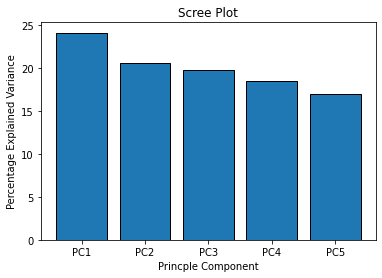

In [14]:
scaled_data = preprocessing.scale(main_df)
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

# Viusalize scree plot
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels, edgecolor='black')
plt.xlabel("Princple Component")
plt.ylabel("Percentage Explained Variance")
plt.title("Scree Plot")
# plt.savefig('Results/Scree Plot.png', bbox_inches='tight')
plt.show()

Print out the PCA Graph by using the 2 most significant PCA's

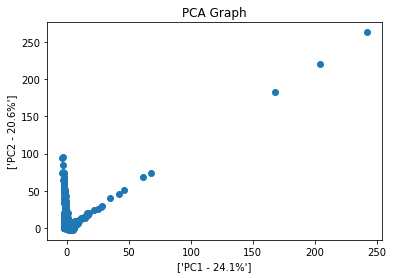

In [15]:
pca_df = pd.DataFrame(pca_data, index=pca_data.T[0], columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Graph')
plt.xlabel(['PC1 - {0}%'.format(per_var[0])])
plt.ylabel(['PC2 - {0}%'.format(per_var[1])])

df1 = pca_df[['PC1', 'PC2']]
plt.savefig('Results/pca_graph.png', bbox_inches='tight')
plt.show()